In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [5]:
dfad= pd.read_csv (r"C:\Users\MiCachi\Documents\skils-pyt\ia\alz\oasis_longitudinal.csv")
dfad.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Variables Subject.ID : Identificador de pacientes.

MRI.ID: Identificador de resonancia magnética de cada paciente.

Group (Converted / Demented / Nondemented) : Clasificación de pacientes al inicio del estudio.

Visit : Numero de visitas.

MR.Delay : No cuenta con descripción.

M.F : Genero.

Age : Edad del paciente.

EDUC : Años de educación.

SES : Estado socioeconómico evaluado por el Índice de posición social de Hollingshead y clasificado en categorías de 1 (estado más alto) a 5 (estado más bajo).

MMSE : Cuestionario de 30 puntos que se usa ampliamente en entornos clínicos y de investigación para medir el deterioro cognitivo. Cualquier puntaje mayor o igual a 24 puntos (de 30) indica una cognición normal. Debajo de esto, los puntajes pueden indicar un deterioro cognitivo grave (≤9 puntos), moderado (10-18 puntos) o leve (19-23 puntos). Es posible que también deba corregirse el puntaje bruto para el nivel educativo y la edad.

CDR : Escala de 5 puntos utilizada para caracterizar seis dominios de rendimiento cognitivo y funcional aplicables a la enfermedad de Alzheimer y las demencias relacionadas: memoria, orientación, juicio y resolución de problemas, asuntos comunitarios, hogar y pasatiempos y cuidado personal. Este puntaje es útil para caracterizar y rastrear el nivel de discapacidad / demencia de un paciente.

eTIV : Volumen intracraneal total estimado en mm3.

nWBV : Volumen normalizado de todo el cerebro, expresado como un porcentaje de todos los vóxeles en la imagen enmascarada de atlas que el proceso automatizado de segmentación de tejidos etiqueta como materia gris o blanca.

ASF : Factor de escala Atlas. Factor de escala calculado que transforma el cerebro y el cráneo del espacio nativo en el objetivo del atlas (es decir, el determinante de la matriz de transformación).

In [6]:
dfad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [7]:
dfad.isnull(). sum ()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [8]:
# Eliminamos datos nulos 
dfad.dropna(subset=["SES","MMSE"], inplace=True)
dfad.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [9]:
dfad.isnull(). sum (). sum ()

0

Por la falla de ambos arboles usare otros modelos
K-Vecinos Más Cercanos (KNN) 

Cambiar data categorica a numerica para que este modelo sea viable 

lo vamos a hacer mapeando un diccionario 

In [10]:
dfad3 = dfad.loc[:,["Subject ID","Age","EDUC","SES","eTIV", "nWBV","ASF", "Group"]]
dfad3.head()

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,Nondemented
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,Nondemented
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,Nondemented
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,Nondemented
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,Nondemented


In [11]:
Groups = {"Nondemented":0, "Demented":1, "Converted":2}

In [12]:
dfad3["Group"] = dfad3["Group"].map(Groups)
dfad3

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,0
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,0
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,0
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,0
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,0
...,...,...,...,...,...,...,...,...
368,OAS2_0185,82,16,1.0,1693,0.694,1.037,1
369,OAS2_0185,86,16,1.0,1688,0.675,1.040,1
370,OAS2_0186,61,13,2.0,1319,0.801,1.331,0
371,OAS2_0186,63,13,2.0,1327,0.796,1.323,0


K-Vecinos Más Cercanos (KNN) 

In [13]:
dfad3

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,0
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,0
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,0
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,0
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,0
...,...,...,...,...,...,...,...,...
368,OAS2_0185,82,16,1.0,1693,0.694,1.037,1
369,OAS2_0185,86,16,1.0,1688,0.675,1.040,1
370,OAS2_0186,61,13,2.0,1319,0.801,1.331,0
371,OAS2_0186,63,13,2.0,1327,0.796,1.323,0


In [14]:
mal = dfad3[dfad3["Group"]== 1]
bien = dfad3[dfad3["Group"]== 0 ]
incierto = dfad3[dfad3["Group"]== 2]
mal, bien, incierto

(    Subject ID  Age  EDUC  SES  eTIV   nWBV    ASF  Group
 15   OAS2_0009   68    12  2.0  1457  0.806  1.205      1
 16   OAS2_0009   69    12  2.0  1480  0.791  1.186      1
 17   OAS2_0010   66    12  3.0  1447  0.769  1.213      1
 18   OAS2_0010   68    12  3.0  1482  0.752  1.184      1
 25   OAS2_0014   76    16  3.0  1602  0.697  1.096      1
 ..         ...  ...   ...  ...   ...    ...    ...    ...
 365  OAS2_0184   72    16  3.0  1354  0.733  1.296      1
 366  OAS2_0184   73    16  3.0  1351  0.708  1.299      1
 367  OAS2_0185   80    16  1.0  1704  0.711  1.030      1
 368  OAS2_0185   82    16  1.0  1693  0.694  1.037      1
 369  OAS2_0185   86    16  1.0  1688  0.675  1.040      1
 
 [127 rows x 8 columns],
     Subject ID  Age  EDUC  SES  eTIV   nWBV    ASF  Group
 0    OAS2_0001   87    14  2.0  1987  0.696  0.883      0
 1    OAS2_0001   88    14  2.0  2004  0.681  0.876      0
 5    OAS2_0004   88    18  3.0  1215  0.710  1.444      0
 6    OAS2_0004   90    18  3

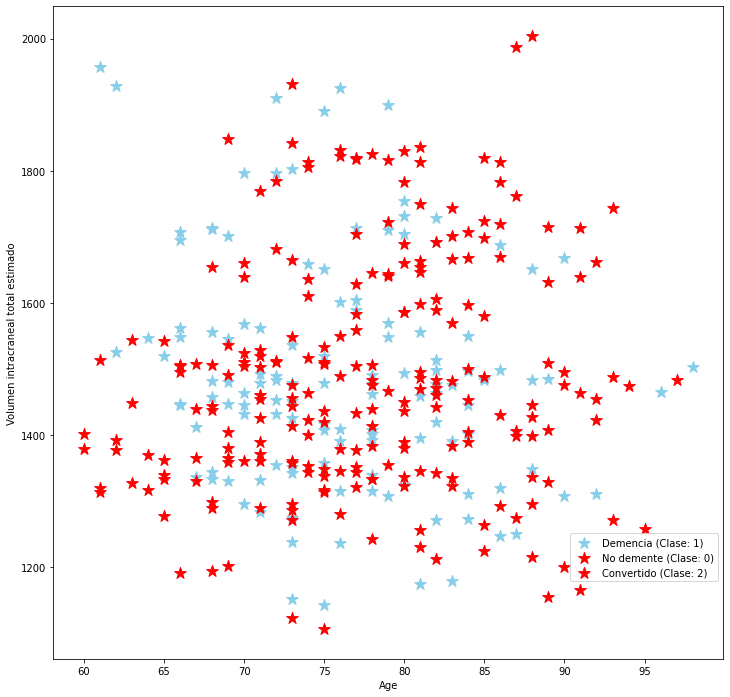

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(mal["Age"], mal["eTIV"],
            marker="*", s=150, color="skyblue",
            label="Demencia (Clase: 1)")

plt.scatter(bien["Age"], bien["eTIV"],
            marker="*", s=150, color="red", 
            label="No demente (Clase: 0)")

plt.scatter(incierto["Age"], incierto["eTIV"],
            marker="*", s=150, color="red", 
            label="Convertido (Clase: 2)")

plt.ylabel("Volumen intracraneal total estimado")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [22]:
data = dfad3[["Age","eTIV",]]
clase = dfad3["Group"]

escalador = preprocessing.MinMaxScaler()
# los numeros mas pequeños lo shace ceros y los mas grandes uno 
# para que quede un rango de cero a uno
data = escalador.fit_transform(data)
data

array([[0.71052632, 0.98106904],
       [0.73684211, 1.        ],
       [0.73684211, 0.12138085],
       [0.78947368, 0.10467706],
       [0.52631579, 0.64922049],
       [0.60526316, 0.66258352],
       [0.65789474, 0.66035635],
       [0.86842105, 0.18485523],
       [0.92105263, 0.16815145],
       [0.21052632, 0.3908686 ],
       [0.23684211, 0.41648107],
       [0.15789474, 0.37973274],
       [0.21052632, 0.41870824],
       [0.47368421, 0.25278396],
       [0.52631579, 0.24164811],
       [0.60526316, 0.24164811],
       [0.55263158, 0.13808463],
       [0.57894737, 0.11804009],
       [0.65789474, 0.1325167 ],
       [0.42105263, 0.55233853],
       [0.44736842, 0.5389755 ],
       [0.73684211, 0.60690423],
       [0.78947368, 0.62583519],
       [0.52631579, 0.75389755],
       [0.55263158, 0.78841871],
       [0.65789474, 0.79510022],
       [0.68421053, 0.78730512],
       [0.71052632, 0.33407572],
       [0.73684211, 0.32516704],
       [0.84210526, 0.35300668],
       [0.

Creación del Modelo KNN
Valor de K

In [23]:
n_neighbors = 354**(1/2)
print (n_neighbors)

18.81488772222678


In [24]:
clasificador = KNeighborsClassifier(n_neighbors=18)
# numero de vecinos esta definido a priori 
# un metodo utilizado es usar la raiz cuadrada del numero de instancias 
# con las que se esta creando el modelo, es decir, el numero de N
clasificador.fit(data, clase)

KNeighborsClassifier(n_neighbors=18)

In [20]:
dfad3.head()

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,0
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,0
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,0
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,0
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,0


C:\Users\MiCachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase [[0.61111111 0.38888889 0.        ]]


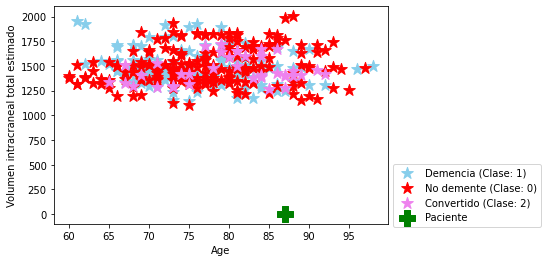

In [26]:
Age = 87
eTIV = 0.883
#Escalar los datos del nuevo solicitante
paciente = escalador.transform([[Age, eTIV]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(paciente))
print("Probabilidades por clase",
      clasificador.predict_proba(paciente))

#Código para graficar
plt.scatter(mal["Age"], mal["eTIV"],
            marker="*", s=150, color="skyblue", label="Demencia (Clase: 1)")

plt.scatter(bien["Age"], bien["eTIV"],
            marker="*", s=150, color="red", label="No demente (Clase: 0)")

plt.scatter(incierto["Age"], incierto["eTIV"],
            marker="*", s=150, color="violet",  label="Convertido (Clase: 2)")

plt.scatter(Age, eTIV, marker="P", s=250, color="green", label="Paciente") 
plt.ylabel("Volumen intracraneal total estimado")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()